In [1]:
# system
import os
import sys
import pickle

# externals 
import pandas as pd
import awkward as ak
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Ellipse
import mplhep as hep
import seaborn as sns
hep.style.use("CMS")

In [26]:
def plot_cluster(ax, ieta, iphi, energy, r=[]):
    ibins = (np.arange(np.min(ieta)-2, np.max(ieta)+3, 1), 
             np.arange(np.min(iphi)-2, np.max(iphi)+3 ,1))
    h = ax.hist2d(ieta, iphi, bins=ibins, weights=energy, cmap='Reds', vmin=0, vmax=10)
    fontlist = ['small', 'x-small', 'xx-small']
    return h

def plot_rec_vs_sim(ix_rec, iy_rec, energy_rec, ix_sim, iy_sim, energy_sim,
                    zoom_rec=False):     
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=100)
    plot_cluster(axs[0], ix_sim, iy_sim, np.exp(energy_sim))
    plot_cluster(axs[1], ix_rec, iy_rec, np.exp(energy_rec))
    xlim = [axs[0].get_xlim()[0]-30, axs[0].get_xlim()[1]+30]
    ylim = [axs[0].get_ylim()[0]-30, axs[0].get_ylim()[1]+30]
    if zoom_rec:
        axs[1].set_xlim(xlim)
        axs[1].set_ylim(ylim)
    plt.show()

In [2]:
indir = '../graph_construction/stats/task_0'
data = {}
for f in os.listdir(indir):
    data[f.split('.')[0]] = pd.read_csv(os.path.join(indir, f))

data.keys()

dict_keys(['OneProngNoPi0', 'ThreeProngsNoPi0', 'OneProngTwoPi0', 'ThreeProngsOnePi0', 'OneProngOnePi0'])

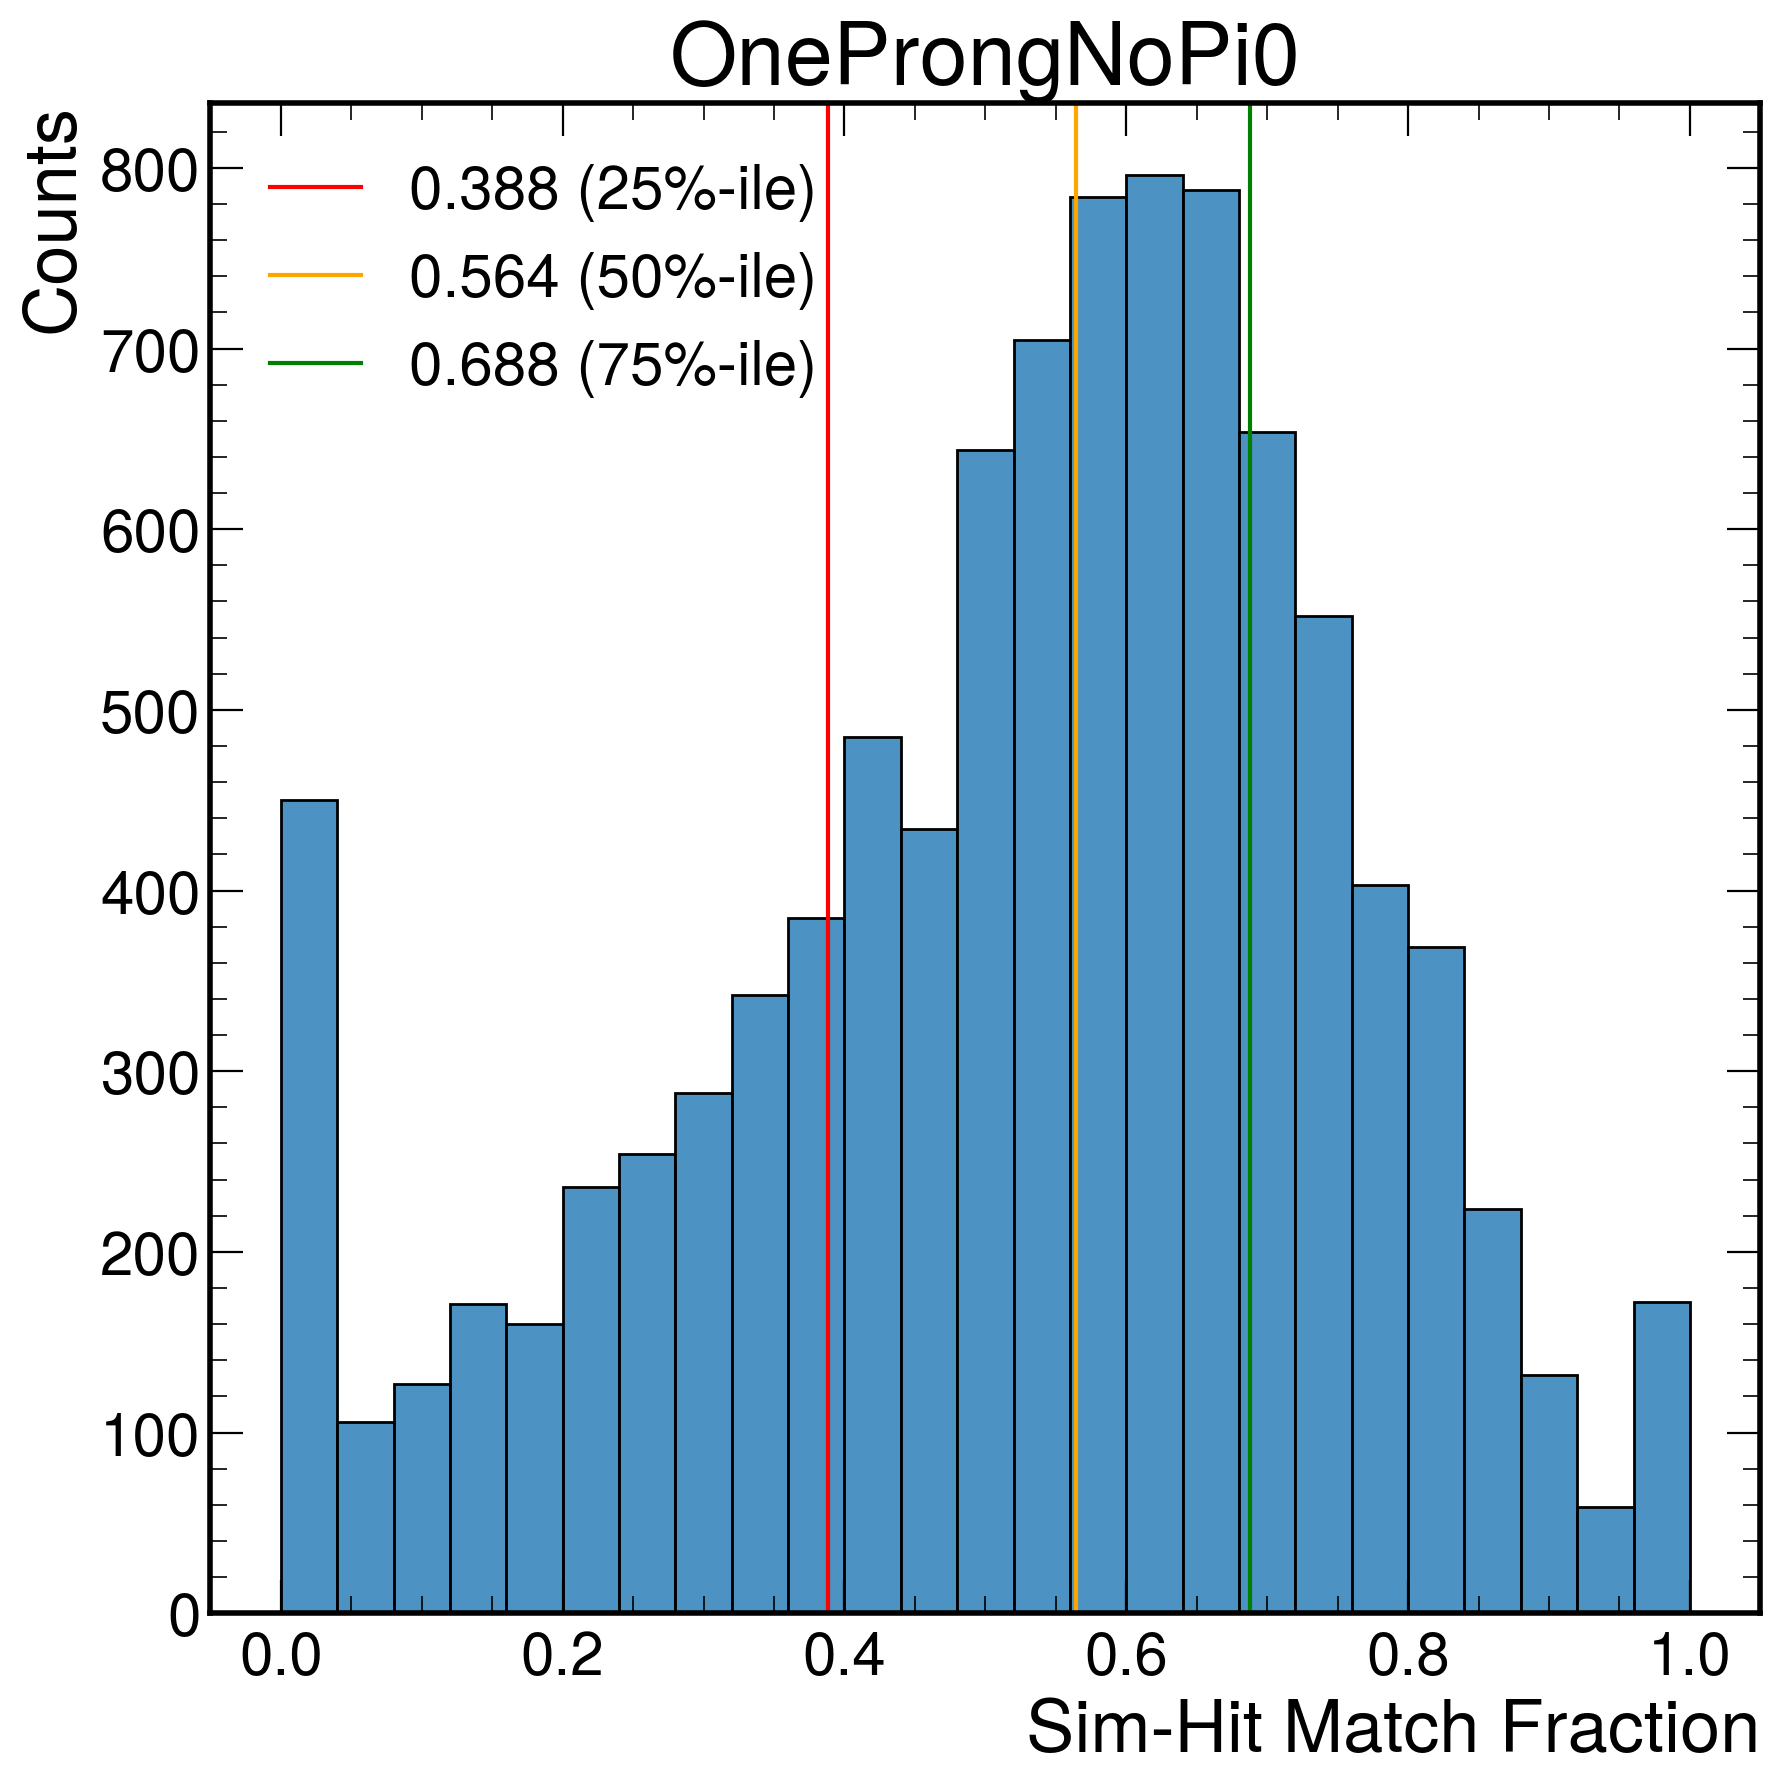

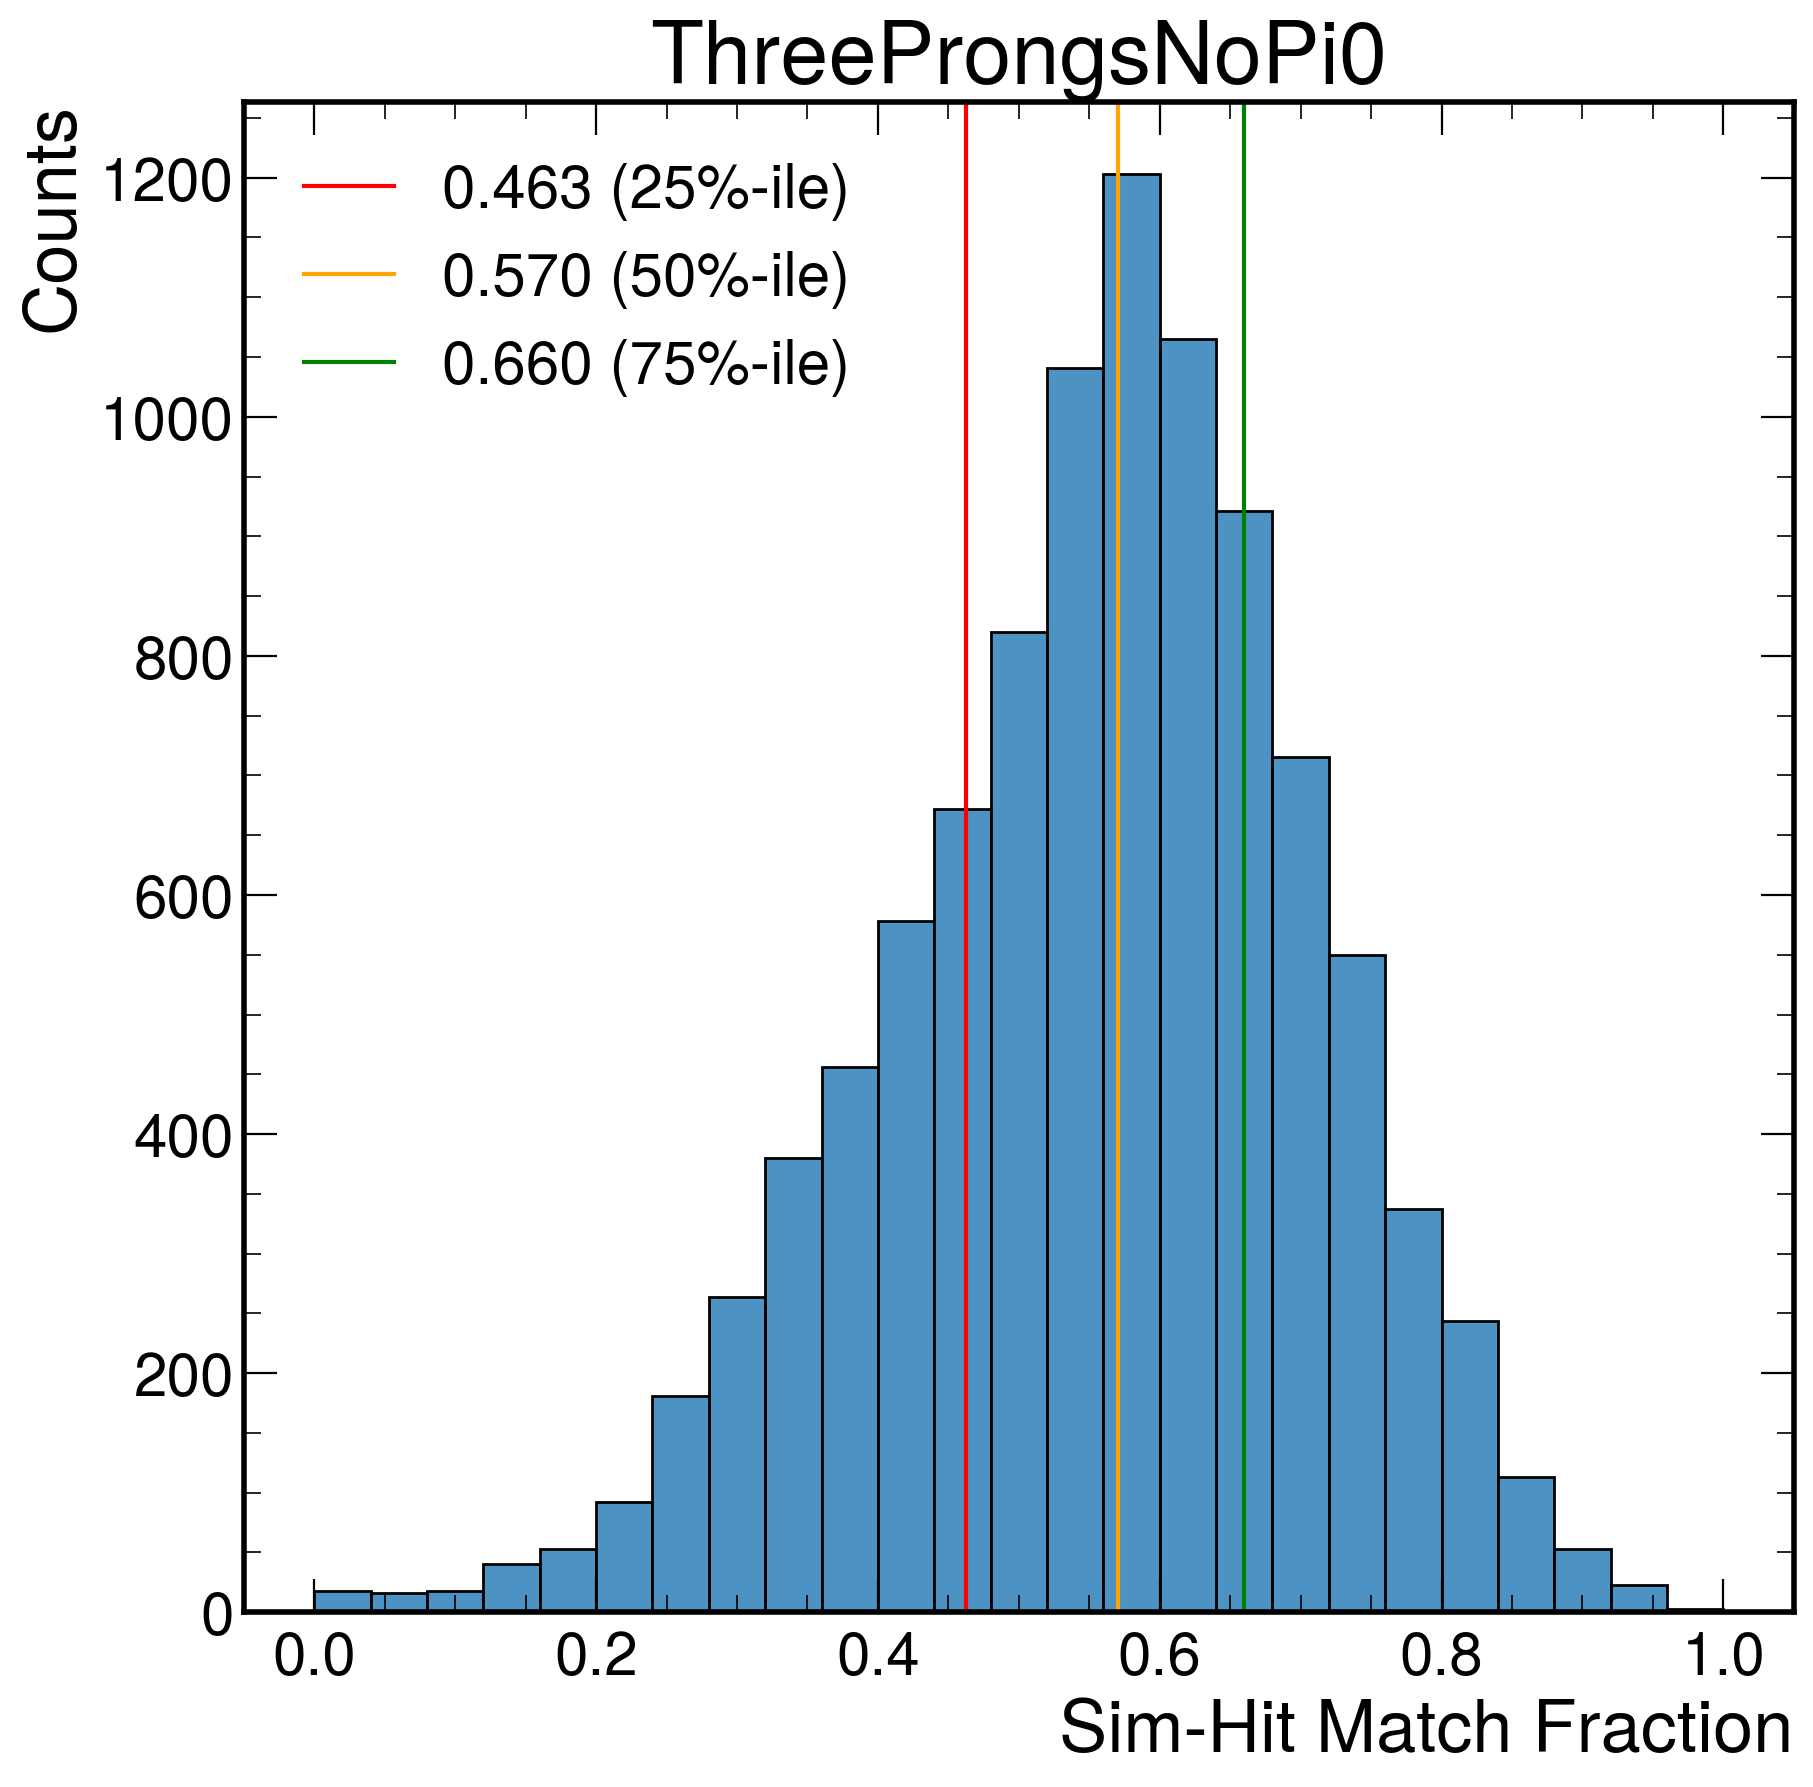

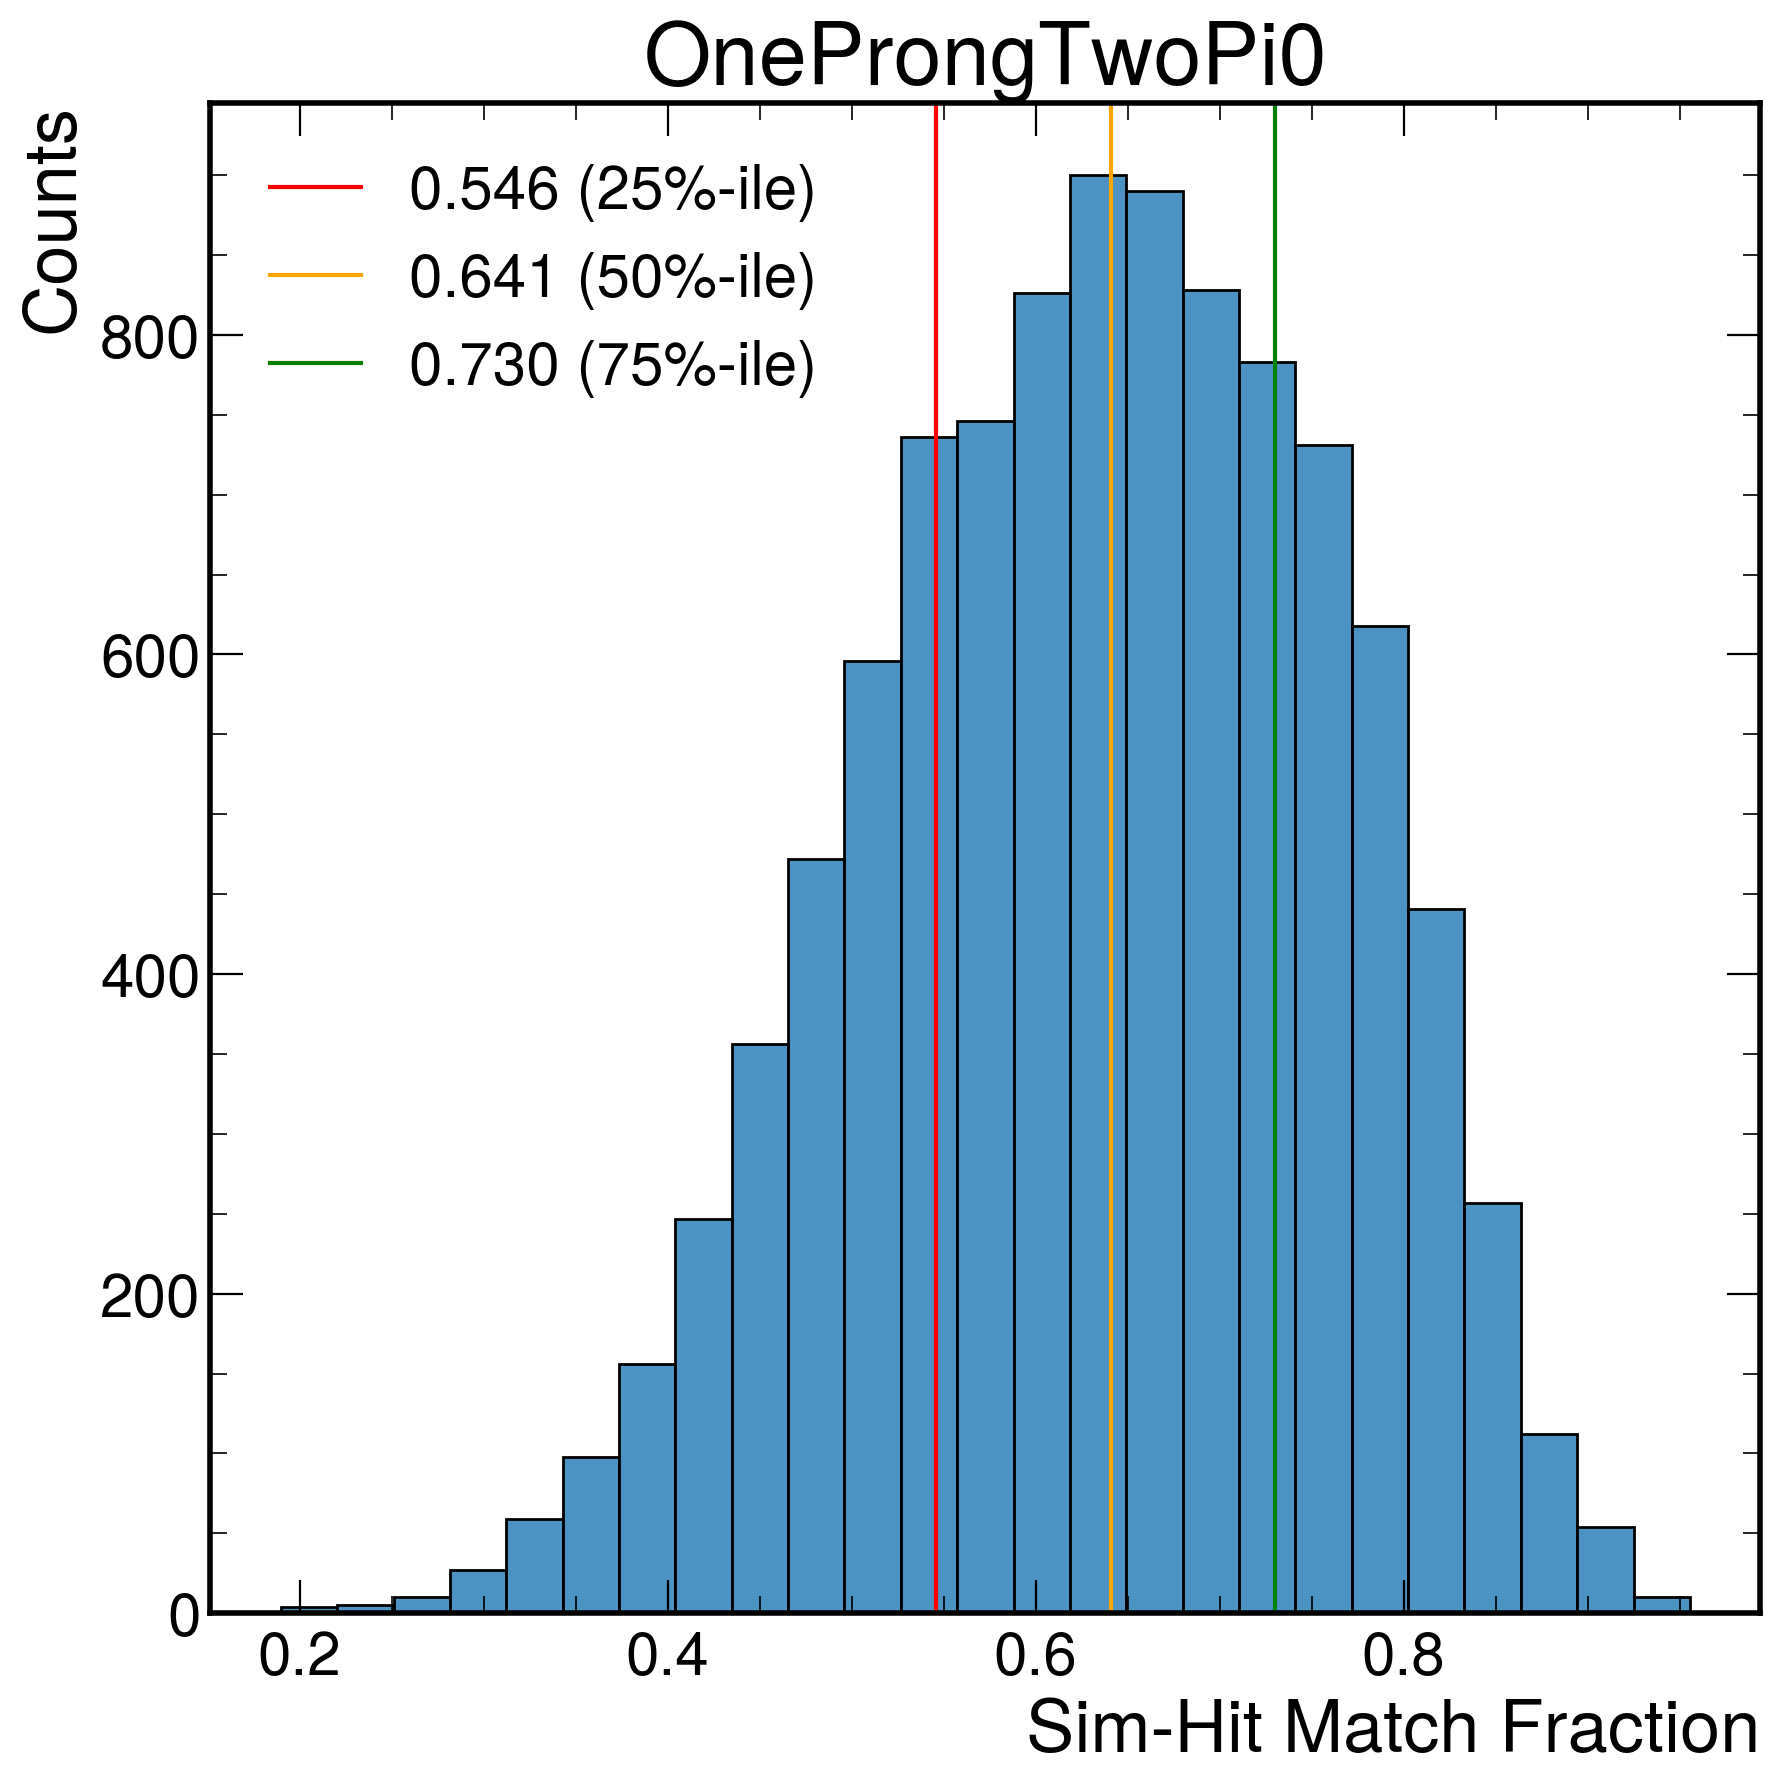

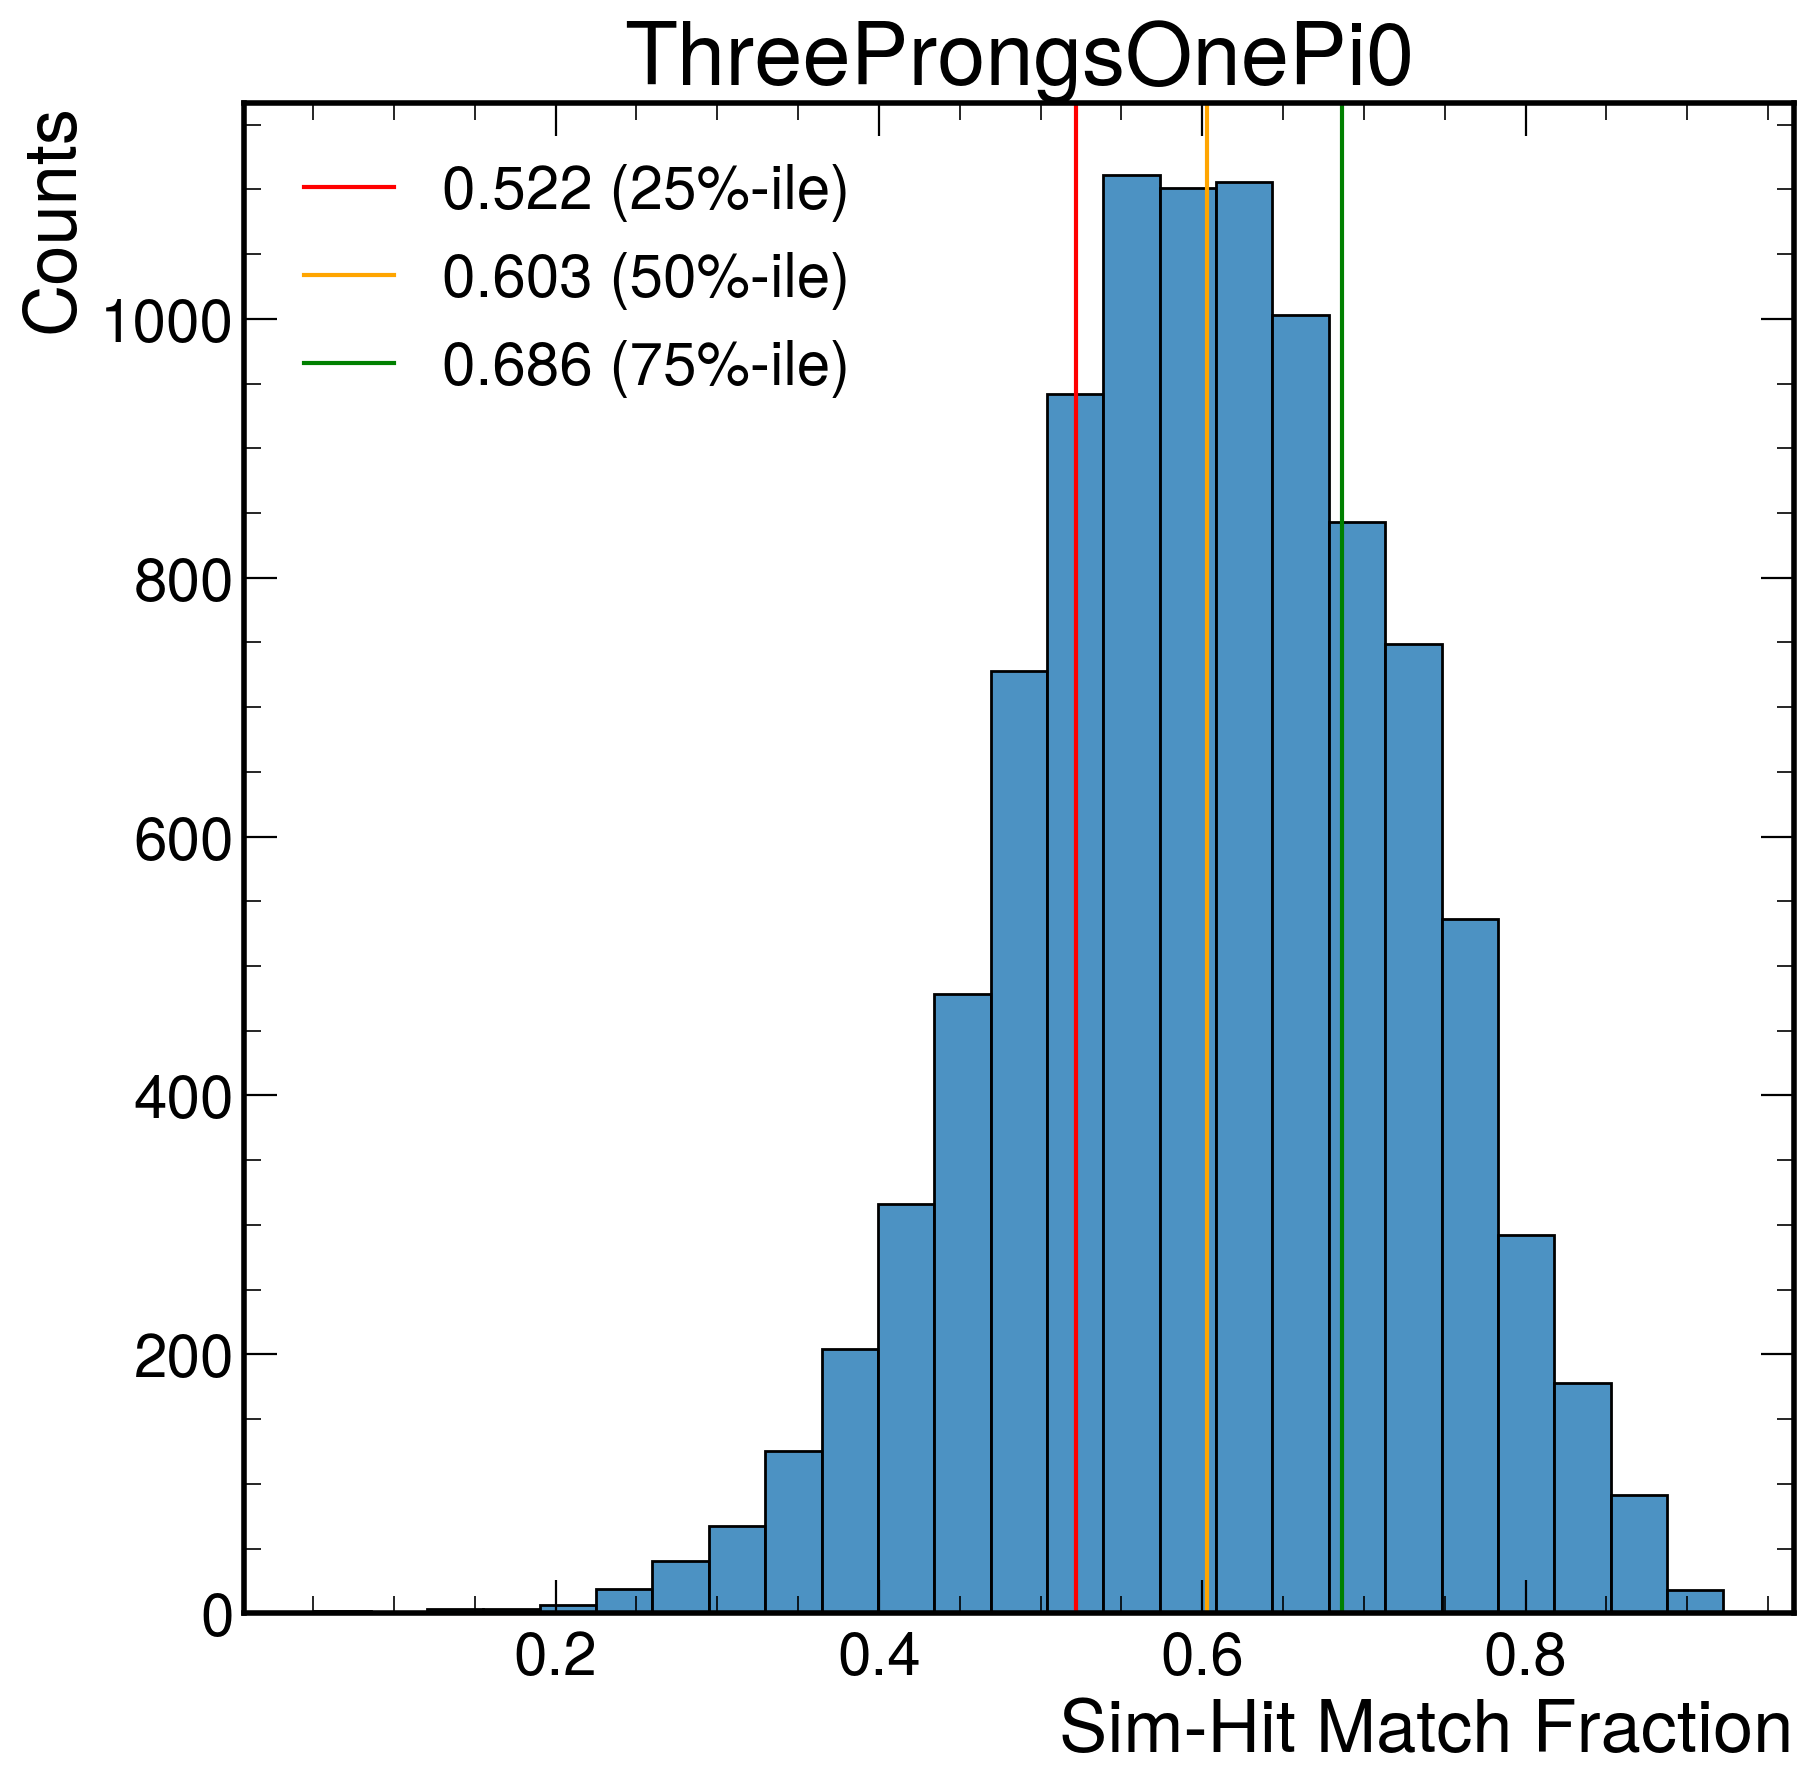

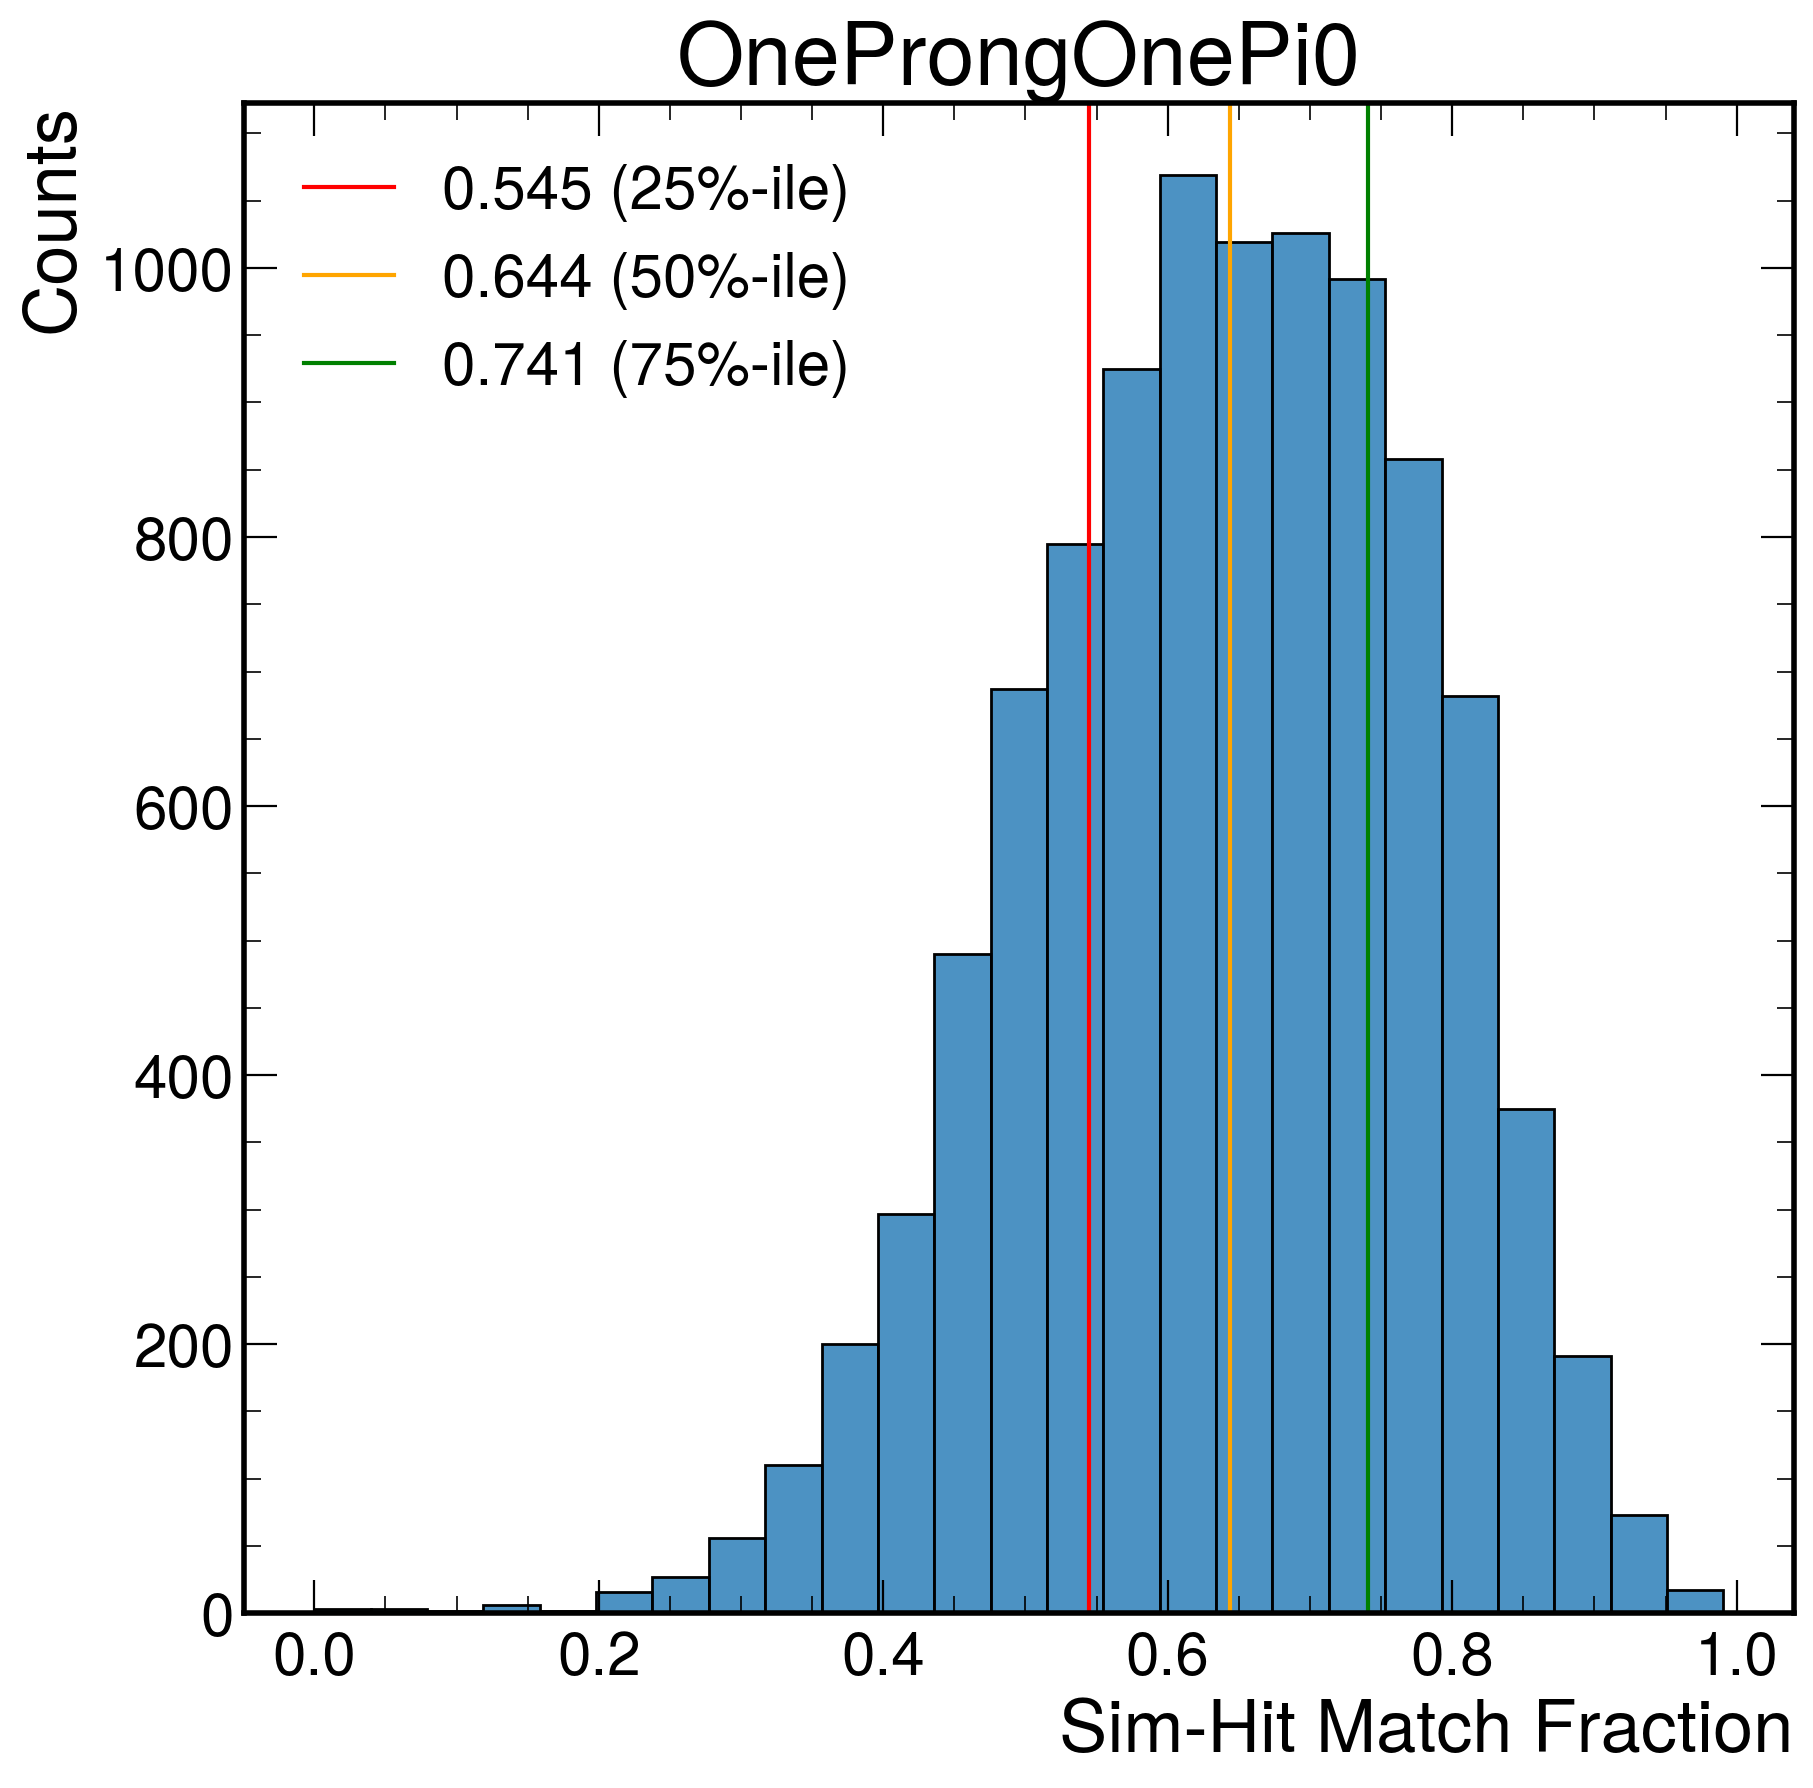

In [10]:
# plot the sim matching efficiency
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    
    fig = plt.figure(dpi=200)
    sns.histplot(sim_effs, bins=25, alpha=0.8)
    twenty_five = np.percentile(sim_effs, 25)
    plt.axvline(x=twenty_five, color='red',
                label=f"{twenty_five:.3f} (25%-ile)")
    fifty = np.percentile(sim_effs, 50)
    plt.axvline(x=fifty, color='orange',
                label=f"{fifty:.3f} (50%-ile)")
    seventy_five = np.percentile(sim_effs, 75)
    plt.axvline(x=seventy_five, color='green',
                label=f"{seventy_five:.3f} (75%-ile)")
    plt.legend(loc='best')
    plt.xlabel('Sim-Hit Match Fraction')
    plt.ylabel('Counts')
    plt.title(name)
    plt.show()

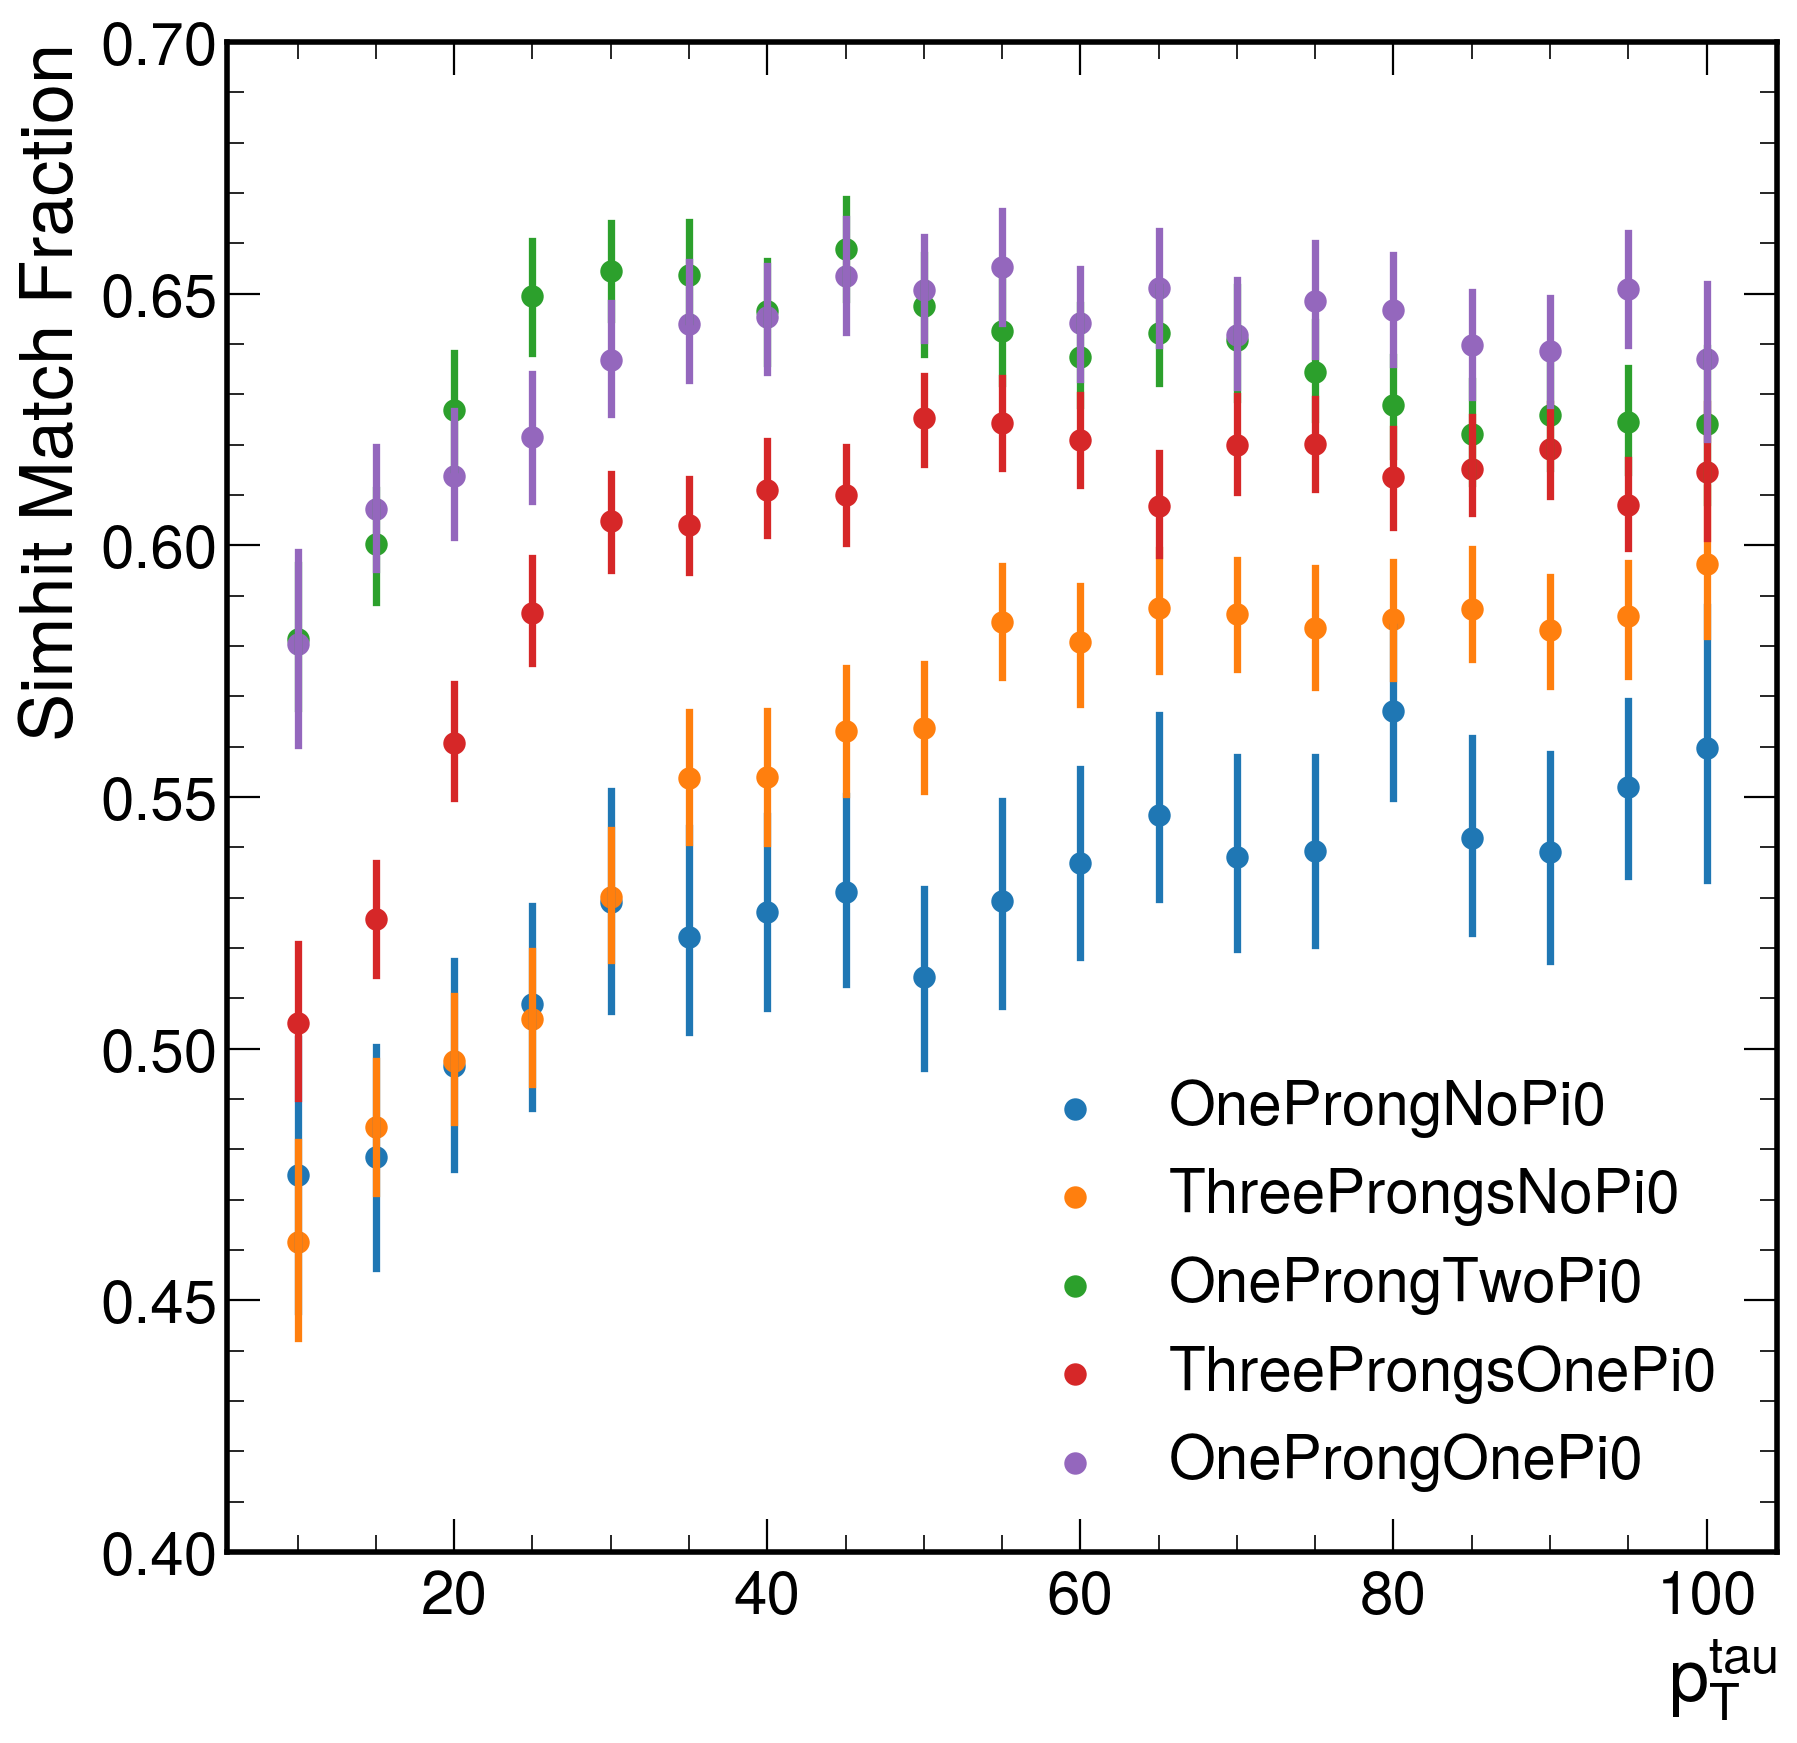

In [13]:
# study sim match eff as a function of tau pt
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    tau_pt = df['tau_pt']
    sns.regplot(x=tau_pt, y=sim_effs, x_bins=np.arange(0,120,5), 
                marker='o', label=name, fit_reg=False)

plt.xlabel(r"$p_T^\mathrm{tau}$")
plt.ylabel("Simhit Match Fraction")
plt.ylim([0.4, 0.7])
plt.legend(loc='best')
plt.show()

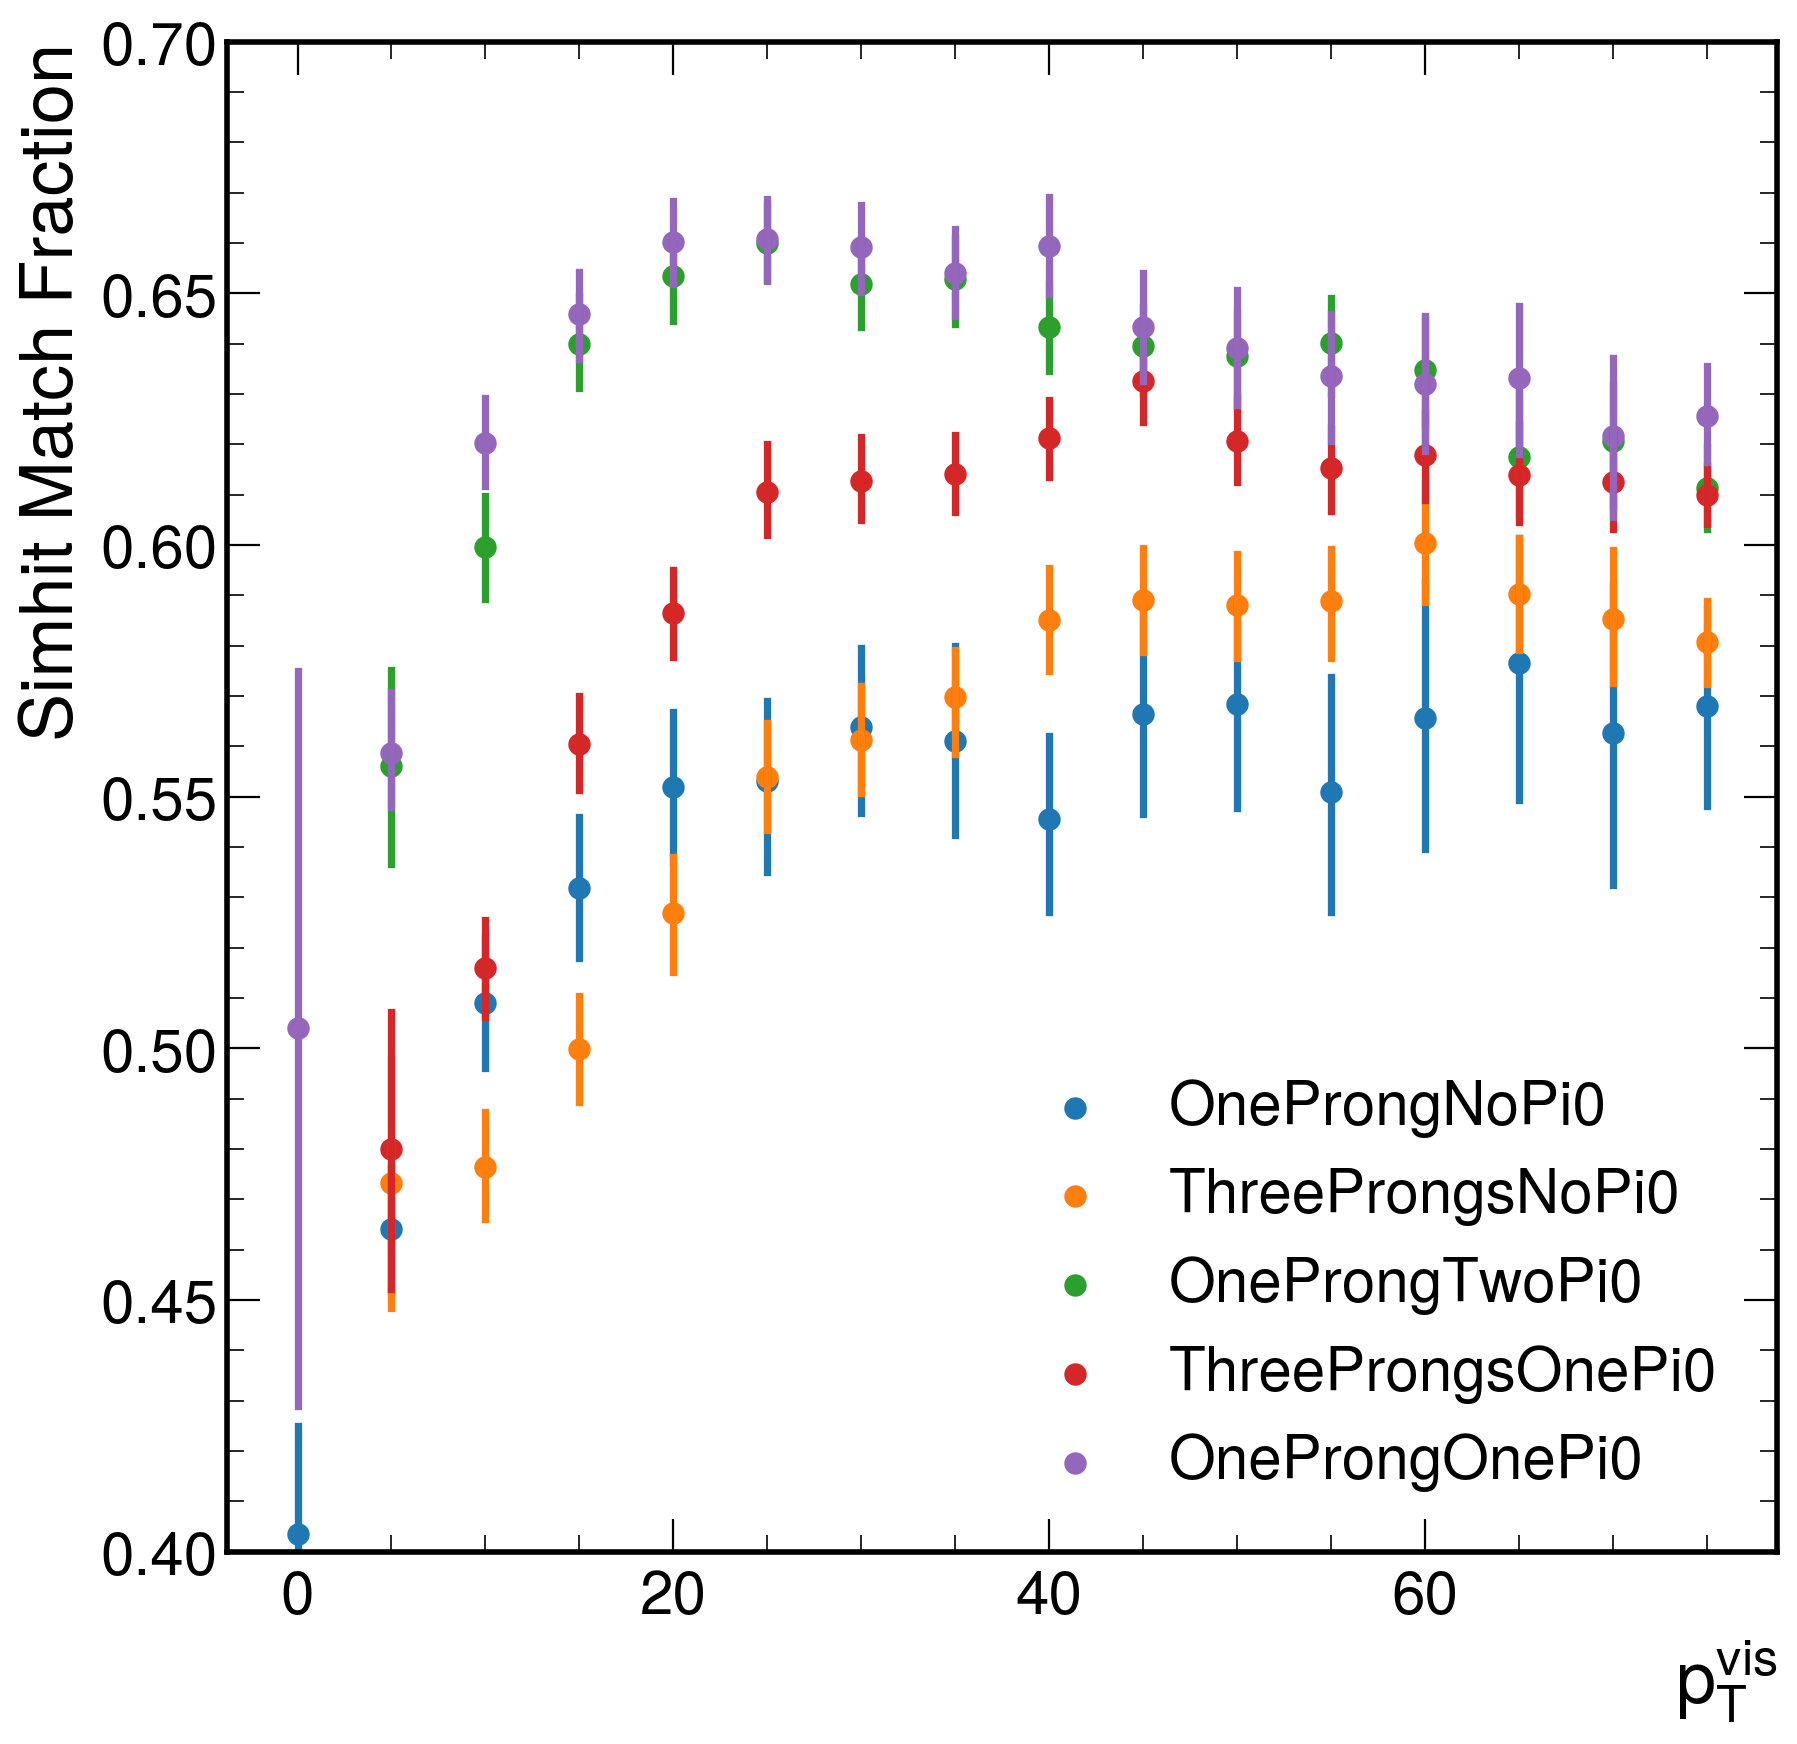

In [16]:
# study sim match eff as a function of tau pt
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    vis_pt = df['vis_pt']
    sns.regplot(x=vis_pt, y=sim_effs, x_bins=np.arange(0,80,5), 
                marker='o', label=name, fit_reg=False)

plt.xlabel(r"$p_T^\mathrm{vis}$")
plt.ylabel("Simhit Match Fraction")
plt.ylim([0.4, 0.7])
plt.legend(loc='best')
plt.show()

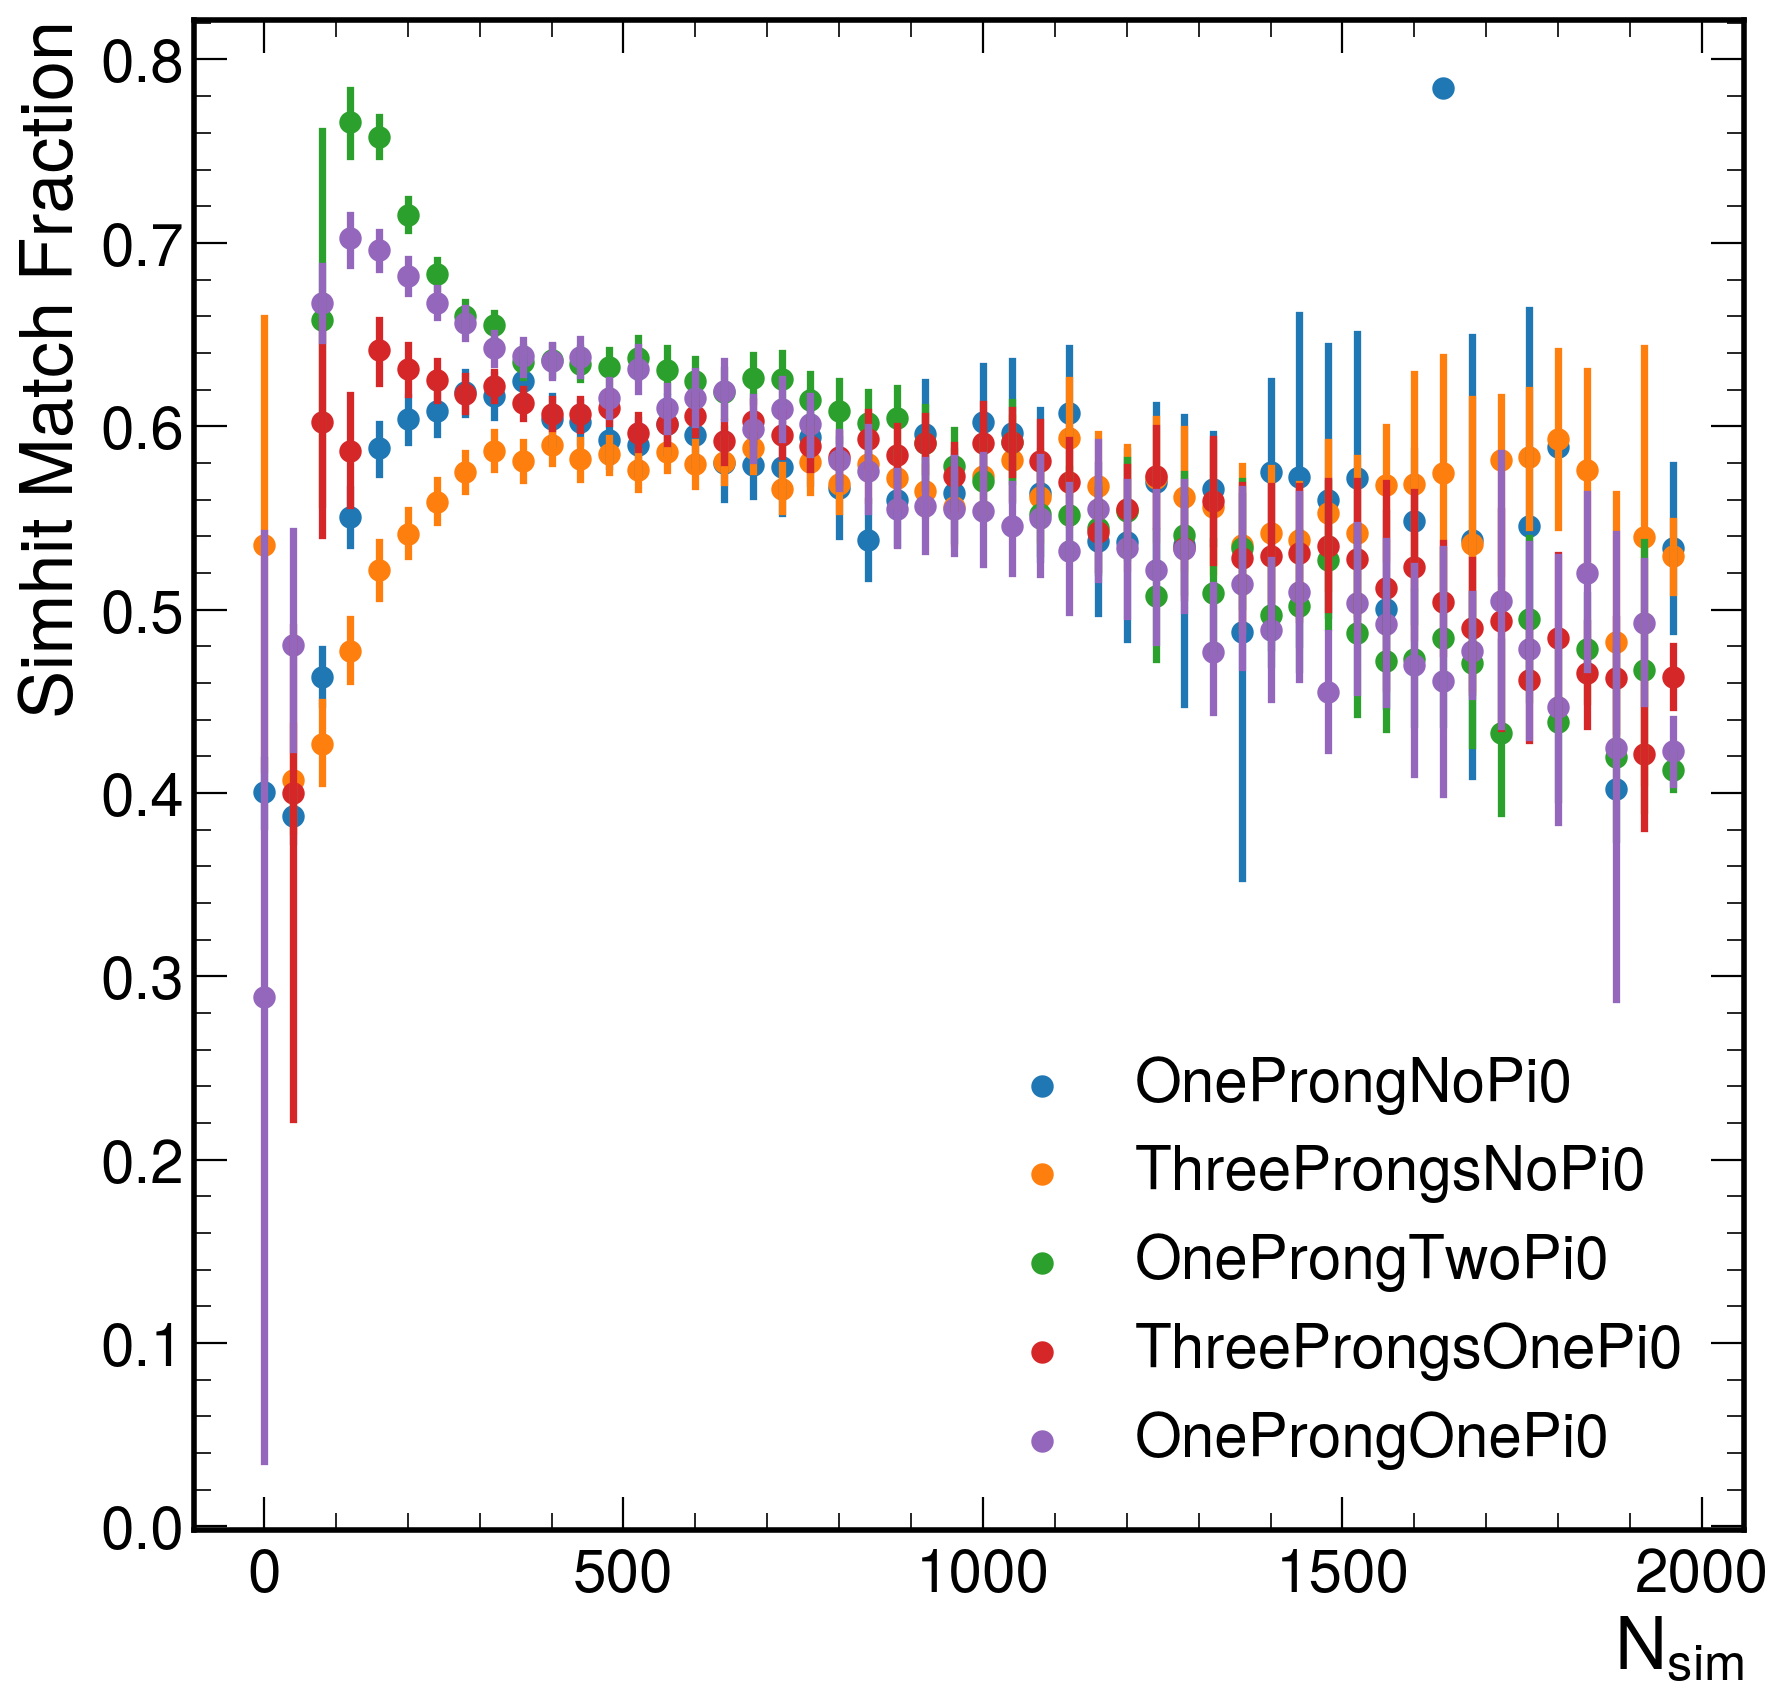

In [25]:
# study sim match eff as a function of n_simhits
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    n_sim = df['total_sim_hits']
    sns.regplot(x=n_sim, y=sim_effs, x_bins=np.arange(0,2000,40), 
                marker='o', label=name, fit_reg=False)

plt.xlabel(r"$N_\mathrm{sim}$")
plt.ylabel("Simhit Match Fraction")
plt.legend(loc='best')
#plt.ylim([0.5,1])
plt.show()

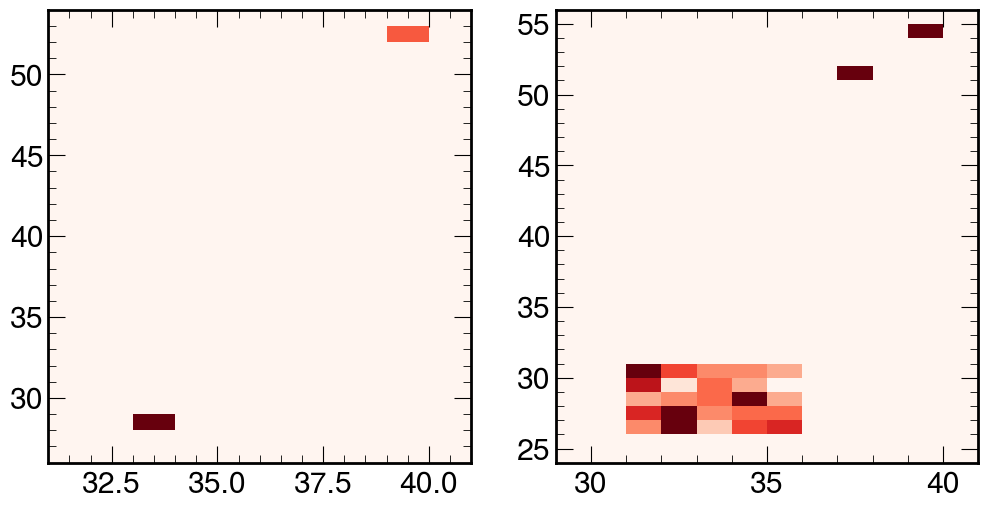

1800     39
1950     39
1793     33
1794     33
1919     33
         ..
10684    33
10783    33
10784    33
10785    33
10786    33
Name: ix_sim, Length: 142, dtype: int32
1800     52
1950     52
1793     28
1794     28
1919     28
         ..
10684    28
10783    28
10784    28
10785    28
10786    28
Name: iy_sim, Length: 142, dtype: int32


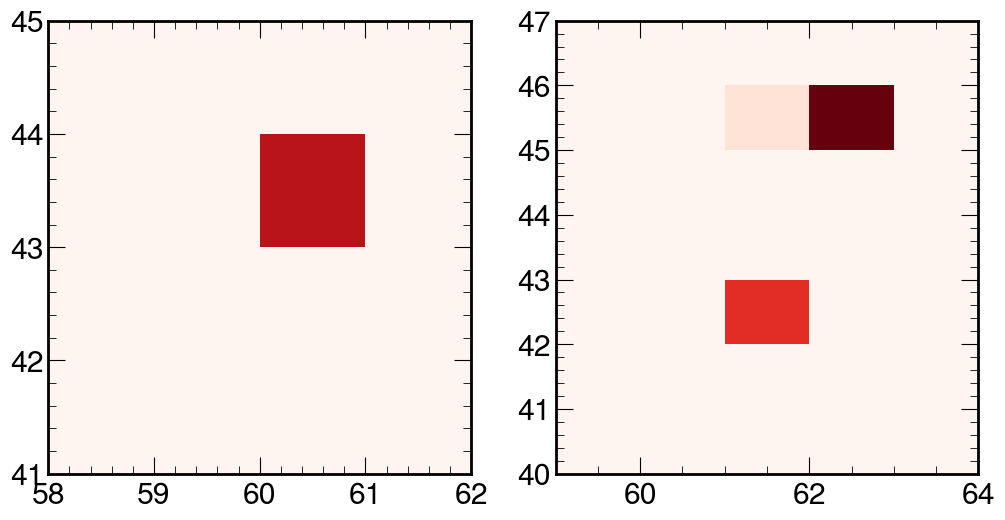

4777    60
4794    60
4828    60
Name: ix_sim, dtype: int32
4777    43
4794    43
4828    43
Name: iy_sim, dtype: int32


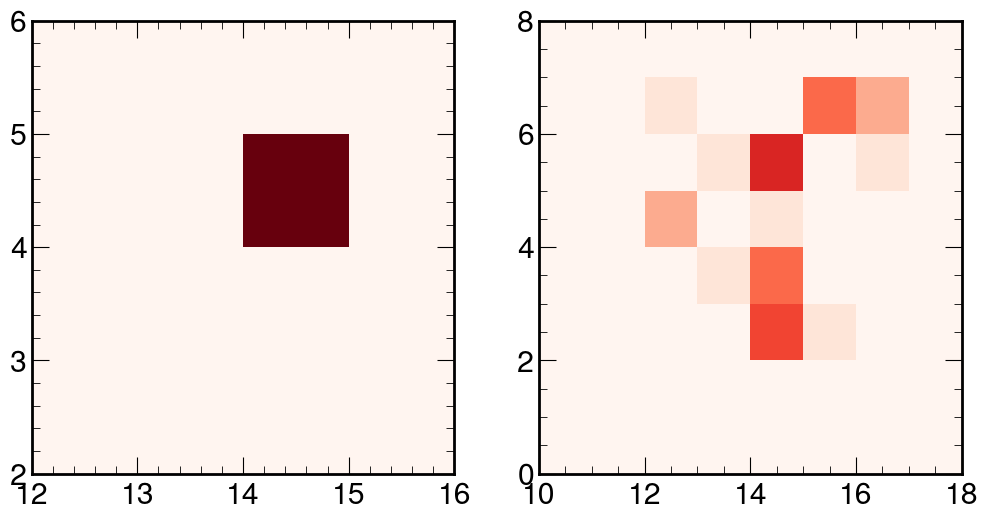

0       14
2       14
4       14
6       14
8       14
10      14
12      14
36      14
38      14
40      14
42      14
44      14
62      14
64      14
84      14
106     14
108     14
2556    14
2558    14
2600    14
2602    14
5188    14
5232    14
5234    14
5236    14
5238    14
5240    14
5270    14
7760    14
7762    14
7764    14
7802    14
7804    14
7806    14
7808    14
Name: ix_sim, dtype: int32
0       4
2       4
4       4
6       4
8       4
10      4
12      4
36      4
38      4
40      4
42      4
44      4
62      4
64      4
84      4
106     4
108     4
2556    4
2558    4
2600    4
2602    4
5188    4
5232    4
5234    4
5236    4
5238    4
5240    4
5270    4
7760    4
7762    4
7764    4
7802    4
7804    4
7806    4
7808    4
Name: iy_sim, dtype: int32


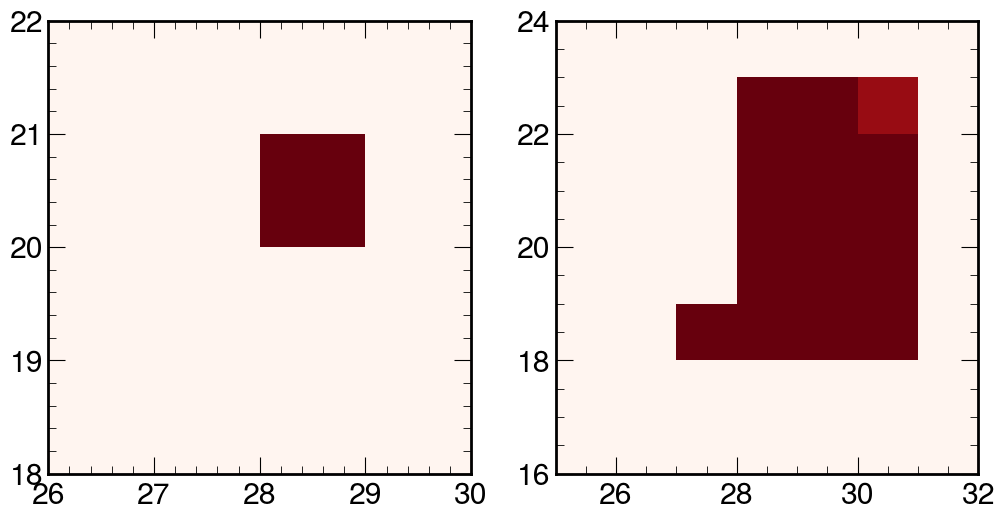

937     28
938     28
939     28
940     28
941     28
        ..
8347    28
8348    28
8349    28
8350    28
8351    28
Name: ix_sim, Length: 384, dtype: int32
937     20
938     20
939     20
940     20
941     20
        ..
8347    20
8348    20
8349    20
8350    20
8351    20
Name: iy_sim, Length: 384, dtype: int32


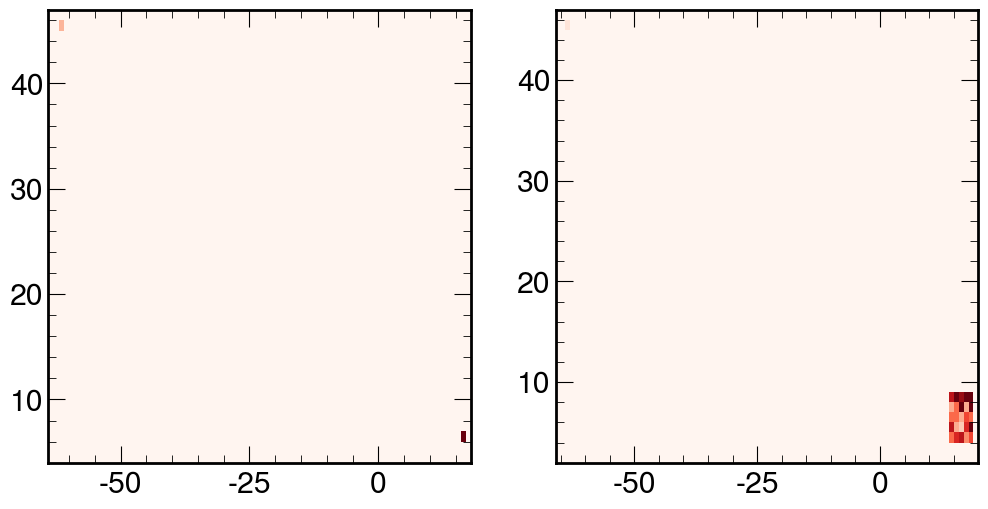

2904    -62
128      16
130      16
132      16
134      16
         ..
18792    16
18794    16
18796    16
18798    16
18800    16
Name: ix_sim, Length: 184, dtype: int32
2904     45
128       6
130       6
132       6
134       6
         ..
18792     6
18794     6
18796     6
18798     6
18800     6
Name: iy_sim, Length: 184, dtype: int32


ValueError: arange: cannot compute length

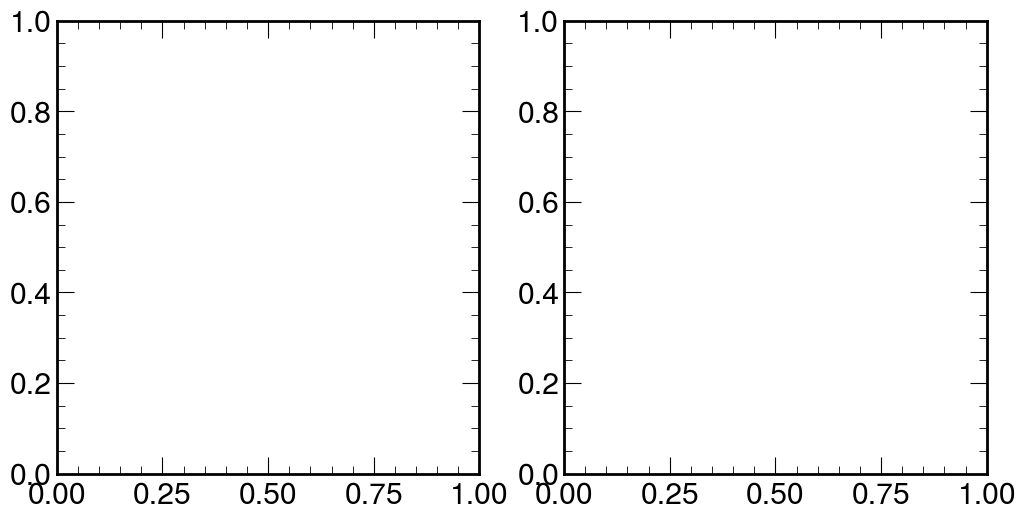

In [46]:
import torch 

for name, df in data.items():
    graph_dir = os.path.join('../graphs/task_0', name)
    graphs = os.listdir(graph_dir)
    for i, graph in enumerate(graphs):
        g = torch.load(os.path.join(graph_dir, graph))
        plot_rec_vs_sim(g.x['ix_rec'], g.x['iy_rec'], g.x['energy_rec'], 
                        g.x['ix_sim'], g.x['iy_sim'], np.ones_like(g.x['iy_sim']))
        print(g.x['ix_sim'])
        print(g.x['iy_sim'])
        if i > 10: break
            
    